Approximate sin(\pi * x) when the inputs are x and t, and t = 0 always

Import Statements

In [149]:
import os
import torch
import torchvision
from torch import nn 
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from torch.utils.data import Dataset
import pyDOE2

Some Variables

In [150]:
n = 200 #num data points

Data Generation

In [151]:
np.random.seed(0)

#generate n random data points between -1 and 1

input_values = np.random.rand(n) * 2 - 1
input_values = np.column_stack((np.zeros(n), input_values)) #Add a second t dimension that is always 0 (of form t,x)

#labels of sin(\pi * x) for each x in Say
label_values = np.sin(input_values[:, 1] * np.pi)



Neural Network

In [152]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.predict = nn.Sequential(
            nn.Linear(2, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        x = self.predict(x)
        return x


Model Training Parameters

In [153]:
network = Network()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(network.parameters())

num_epochs = 500

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: " + ("GPU" if torch.cuda.is_available() else "CPU"))
network.to(device)

input_data = torch.tensor(input_values.astype(np.float32)).to(device).view(-1, 2)
label_data = torch.tensor(label_values.astype(np.float32)).to(device).view(-1, 1)

Using device: CPU


Model Training

In [154]:
for epoch in range(num_epochs):

    output = network(input_data)
    loss = criterion(output, label_data)

    print(loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

0.5308600664138794
0.5281438231468201
0.5255298018455505
0.5230162739753723
0.520607590675354
0.5182897448539734
0.5160670280456543
0.5139405131340027
0.5119103789329529
0.5099738836288452
0.5081320405006409
0.5063835382461548
0.5047325491905212
0.5031713843345642
0.5018143653869629
0.5006536245346069
0.4995195269584656
0.49846893548965454
0.4974844455718994
0.4968107342720032
0.49607279896736145
0.4953756332397461
0.4947177767753601
0.4941007196903229
0.49352124333381653
0.49297451972961426
0.4924135208129883
0.491810142993927
0.49133652448654175
0.49087294936180115
0.49042195081710815
0.4899553954601288
0.48948004841804504
0.48898178339004517
0.48843973875045776
0.4878617525100708
0.48722875118255615
0.48653069138526917
0.48575466871261597
0.4848850965499878
0.4838937819004059
0.4827518165111542
0.4814441204071045
0.47995221614837646
0.47825920581817627
0.4763527810573578
0.474206805229187
0.47179728746414185
0.469105988740921
0.46612197160720825
0.46283090114593506
0.459138840436935

2d Graphing at t = 0 of Labels and Predictions

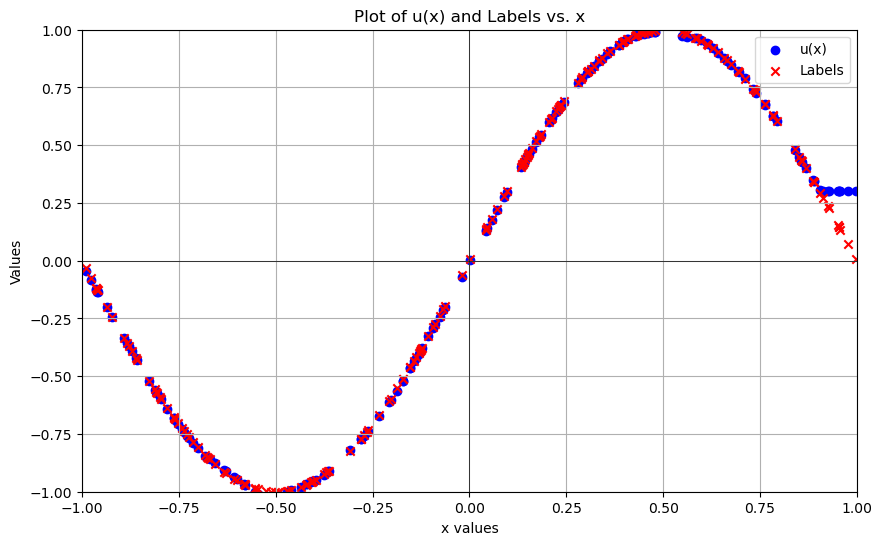

In [155]:
def plot_tensors(x, u, labels):
    # Convert tensors to numpy arrays
    x_np = x
    u_np = u

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_np, u_np, color='blue', marker='o', label='u(x)')
    
    if labels is not None:
        labels_np = labels
        plt.scatter(x_np, labels_np, color='red', marker='x', label='Labels')
    
    plt.title('Plot of u(x) and Labels vs. x')
    plt.xlabel('x values')
    plt.ylabel('Values')
    plt.grid(True)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.show()

# Example usage:
x = input_values[:, 1]
u = network(torch.Tensor(input_values.astype(np.float32)).view(-1,2)).detach().numpy()


plot_tensors(x, u, label_values)

2d Graphing at t = 0 of Random Points and Predictions

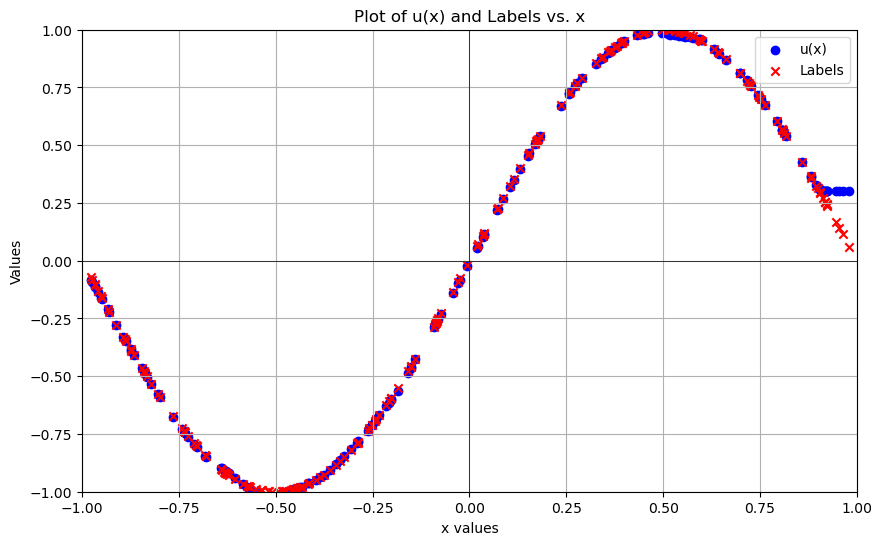

In [156]:
test_n = n

test_input_values = np.random.rand(test_n) * 2 - 1
test_input_values = np.column_stack((np.zeros(test_n), test_input_values)) #Add a second t dimension that is always 0

#labels of sin(\pi * x) for each x in Say
test_label_values = np.sin(test_input_values[:, 1] * np.pi)


def plot_tensors(x, u, labels):
    # Convert tensors to numpy arrays
    x_np = x
    u_np = u

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_np, u_np, color='blue', marker='o', label='u(x)')
    
    if labels is not None:
        labels_np = labels
        plt.scatter(x_np, labels_np, color='red', marker='x', label='Labels')
    
    plt.title('Plot of u(x) and Labels vs. x')
    plt.xlabel('x values')
    plt.ylabel('Values')
    plt.grid(True)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.show()

# Example usage:
x = test_input_values[:, 1]
u = network(torch.Tensor(test_input_values.astype(np.float32)).view(-1,2)).detach().numpy()


plot_tensors(x, u, test_label_values)

3d Graphing for -1 \leq x \leq 1 and 0 \leq t \leq 1

[[ 0.7897124 ]
 [ 0.30284384]
 [-0.07789579]
 ...
 [-0.10732585]
 [ 0.8115531 ]
 [ 0.48908746]]
[0.97425621 0.990345   0.4090541  ... 0.76420221 0.1876222  0.95137218]


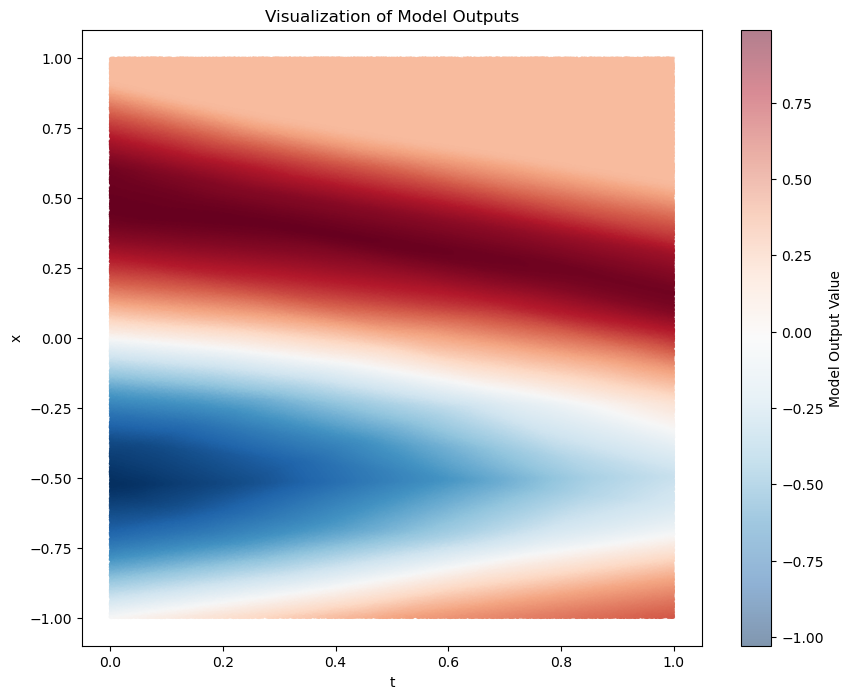

In [157]:
#Generate Random Points
num_points = 1000000
num_boundary_points = 0 #add some points just on t = 0
t_values = np.random.uniform(0, 1, num_points)
t_values = np.hstack((t_values, np.zeros(num_boundary_points)))
x_values = np.random.uniform(-1, 1, num_points + num_boundary_points)


points = np.vstack((t_values, x_values)).T
points_tensor = torch.tensor(points, dtype=torch.float32).to(device)



#Feed the Points through the Model
with torch.no_grad():
    model_outputs = network(points_tensor).cpu().numpy()
    #print(model_outputs)

print(model_outputs[20:])
print(points[20:, 0])


#Plotting
plt.figure(figsize=(10, 8))
plt.scatter(t_values, x_values, c=model_outputs.squeeze(), cmap='RdBu_r', s=1, alpha=0.5)
plt.xlabel("t")
plt.ylabel("x")
plt.colorbar(label='Model Output Value')
plt.title("Visualization of Model Outputs")
plt.show()
